In [1]:
!echo $PATH

/Users/djkim/opt/anaconda3/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin


In [2]:
import sys
sys.executable

'/Users/djkim/opt/anaconda3/bin/python'

In [1]:
# print integer and float value 
print("Geeks : % 2d, Portal : % 5.2f" %(1, 05.333))  
print("Geeks : {:2d}, Portal : {:5.2f}".format(1, 05.333))  
print(f'Geeks : {1:2d}, Portal : {05.333:5.2f}')
#f=formatted string

#str.ljust(), str.rjust(), str.centre()
ex = "I love geeksforgeeks"
print(ex.center(40))
print(ex.center(40, '-'))  
print(ex.ljust(40, '-')) 
print(ex.rjust(40, '-')) 

Geeks :  1, Portal :  5.33
Geeks :  1, Portal :  5.33
Geeks :  1, Portal :  5.33
          I love geeksforgeeks          
----------I love geeksforgeeks----------
I love geeksforgeeks--------------------
--------------------I love geeksforgeeks


In [3]:
import datetime as dt
t=dt.datetime.now()
print(t.strftime('%A'))
print(t.strftime('%c'))
print(t.strftime('%x'))

Sunday
Sun Nov  3 22:14:25 2019
11/03/19


In [ ]:
'''
np.array, np.arange(start, end, step), np.linspace(start, end, number)
A*B #elementwise product
A@B #matrix product
'''

In [ ]:
'''
import np.random as rp
rp.seed(1)
rp.rand(10)
rp.normal(10)
rp.standard_normal(10)

'''

mu= 0.0606, std=0.8852
mu= 0.0753, std=1.1401


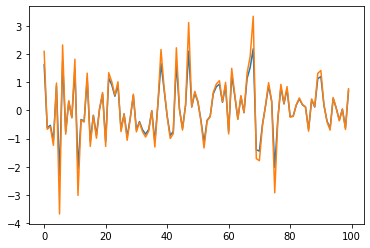

In [6]:
import numpy.random as rp
from scipy.stats import norm, t

rp.seed(1)

#normal sample
z = rp.normal(size=100)

#find the probability (CDF)
p = norm.cdf(z)

#find the probability (percent point function)
t = t.ppf(p, df=4)

print('mu= {:5.4f}, std={:5.4f}'.format(z.mean(),z.std()))
print('mu= {:5.4f}, std={:5.4f}'.format(t.mean(),t.std()))
     
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(z)
plt.plot(t)

In [19]:
#DJ Choice
import numpy as np
from scipy.stats import norm, t

np.random.seed(1)
n, df1, df2 = 100, 3, 3

#assume rf ~ t
rf1 = t.rvs(size=n, df=df1)
rf2 = t.rvs(size=n, df=df2)

#t -> CDF -> normal
rf1_n = norm.ppf(t.cdf(rf1, df=df1))
rf2_n = norm.ppf(t.cdf(rf2, df=df2))

#multivariate normal sampling
mu = np.array([rf1_n.mean(), rf2_n.mean()])
vcv = np.cov(rf1_n, rf2_n)
mc = np.random.multivariate_normal(mu, vcv, size=(n,))

#normal -> CDF -> t
mc1 = t.ppf(norm.cdf(mc)[:,0], df=df1)
mc2 = t.ppf(norm.cdf(mc)[:,1], df=df2)

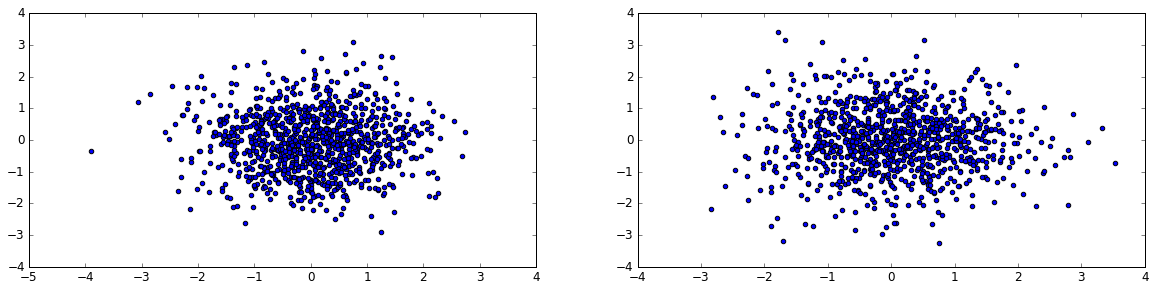

In [17]:
from scipy.stats import kurtosis
print('initial rf_1 : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(rf1.mean(),rf1.std(),kurtosis(rf1)))
print('initial rf_2 : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(rf2.mean(),rf2.std(),kurtosis(rf2)))

print('final rf_1 : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(mc1.mean(),mc1.std(),kurtosis(mc1)))
print('final rf_2 : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(mc2.mean(),mc2.std(),kurtosis(mc2)))

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.style.use('classic')
plt.subplot(2,2,1)
plt.scatter(rf1, mc1)
plt.subplot(2,2,2)
plt.scatter(rf2, mc2)
plt.show()

initial rf_1 : mu= 0.0388, std=0.9810, kurtosis=0.2336
initial rf_2 : mu= 0.0273, std=1.0300, kurtosis=-0.1561
mid rf_1 : mu= 0.0388, std=0.9810, kurtosis=0.2336
mid rf_2 : mu= 0.0273, std=1.0300, kurtosis=-0.1561
final rf_1 : mu= 0.0285, std=0.9604, kurtosis=-0.1199
final rf_2 : mu= 0.0189, std=1.0326, kurtosis=-0.0044


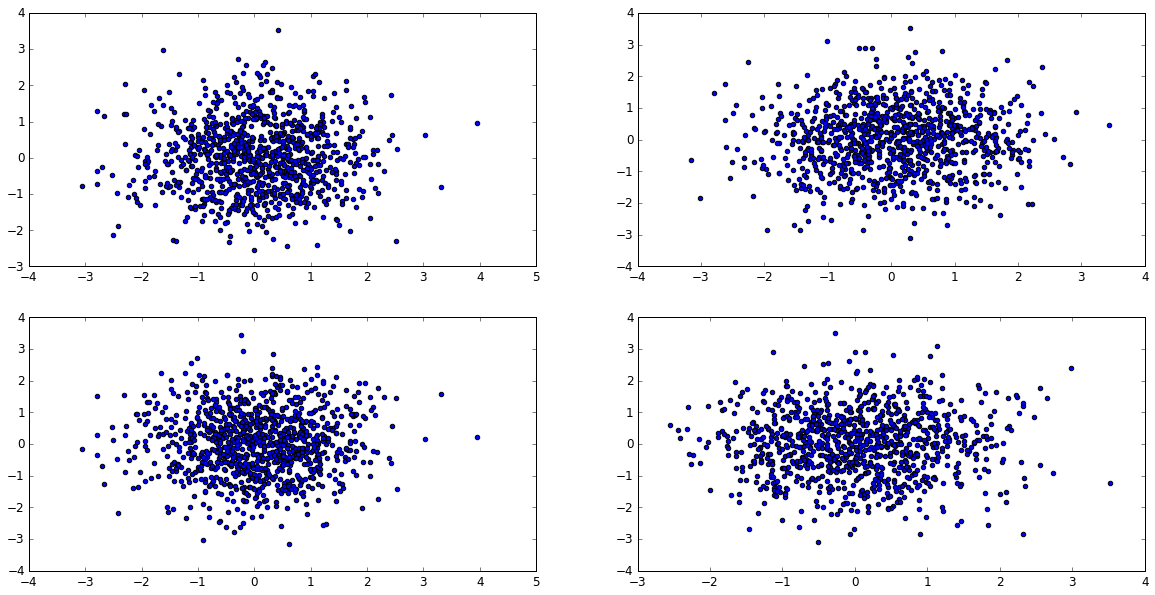

In [30]:
#what if normal
import numpy as np
from scipy.stats import norm, t, kurtosis

np.random.seed(1)
n= 1000

#assume rf ~ normal
rf1 = norm.rvs(size=n)
rf2 = norm.rvs(size=n)

#normal -> CDF -> normal
rf1_n = norm.ppf(norm.cdf(rf1))
rf2_n = norm.ppf(norm.cdf(rf2))

#multivariate normal sampling
mu = np.array([rf1_n.mean(), rf2_n.mean()])
vcv = np.cov(rf1_n, rf2_n)
mc = np.random.multivariate_normal(mu, vcv, size=(n,))

mc1 = mc[:,0]
mc2 = mc[:,1]


print('initial rf_1 : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(rf1.mean(),rf1.std(),kurtosis(rf1)))
print('initial rf_2 : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(rf2.mean(),rf2.std(),kurtosis(rf2)))

print('mid rf_1 : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(rf1_n.mean(),rf1_n.std(),kurtosis(rf1_n)))
print('mid rf_2 : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(rf2_n.mean(),rf2_n.std(),kurtosis(rf2_n)))

print('final rf_1 : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(mc1.mean(),mc1.std(),kurtosis(mc1)))
print('final rf_2 : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(mc2.mean(),mc2.std(),kurtosis(mc2)))

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.style.use('classic')
plt.subplot(2,2,1)
plt.scatter(rf1, mc1)
plt.subplot(2,2,2)
plt.scatter(rf2, mc2)
plt.subplot(2,2,3)
plt.scatter(rf1, rf2)
plt.subplot(2,2,4)
plt.scatter(mc1, mc2)

plt.show()

In [4]:
import numpy as np
from scipy.stats import norm, kurtosis, t, levy_stable

np.random.seed(1)

n=100
#t-dist random variable
df1 = 3
r1 = t.rvs(df=df1, size=n)
df2 = 3
r2 = t.rvs(df=df2, size=n)

#convert to normal random variable
p1 = t.cdf(r1, df=df1)
z1 = norm.ppf(p1)
p2 = t.cdf(r2, df=df2)
z2 = norm.ppf(p2)

#multivariate normal sampling
mu = np.array([z1.mean(), z2.mean()])
vcv = np.cov(z1,z2)
z = np.random.multivariate_normal(mu, vcv, size=(n,))

#back to t-dist random variable
p = norm.cdf(z)
p1 = p[:,0]
p2 = p[:,1]
t1 = t.ppf(p1, df=df1)
t2 = t.ppf(p2, df=df2)

print('initial student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(r1.mean(),r1.std(),kurtosis(r1)))
print('initial student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(r2.mean(),r2.std(),kurtosis(r2)))

print('final student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(t1.mean(),t1.std(),kurtosis(t1)))
print('final student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(t2.mean(),t2.std(),kurtosis(t2)))


initial student t dist : mu= 0.2696, std=1.6298, kurtosis=10.8715
initial student t dist : mu= 0.0079, std=1.4553, kurtosis=14.2147
final student t dist : mu= 0.2501, std=1.3992, kurtosis=6.2804
final student t dist : mu= 0.4080, std=2.5373, kurtosis=47.5299


In [ ]:
'''
df.index, columns, values, dtypes
df[mask][[columns]] = df.loc[mask,[columns]]
df['e']=0, df.loc[mask,'e']=0, not df[mask,'e']=0
df.mean(), apply(), describe(), plot(), hist()
df.apply(np.cumsum) = np.cumsum(df)
'''

In [4]:
'''
import my_info as my
my.x
my.y
etc

#read files
f = open('input.txt','r')
for line in f.readlines():
    print(line)
f.close()

#input from user
name = input('Enter your name: ')
print('Hello ' + name + '!')
'''


"\nimport my_info as my\nmy.x\nmy.y\netc\n\n#read files\nf = open('input.txt','r')\nfor line in f.readlines():\n    print(line)\nf.close()\n\n#input from user\nname = input('Enter your name: ')\nprint('Hello ' + name + '!')\n"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.DataFrame(np.random.randn(6,4), index=pd.date_range('20191103',periods=6), columns=list('abcd'))
print(df)
mask = df.a > 0
df1 = df.loc[mask, ['a']]
print(df1)
df1.loc[mask,:] = 20
print(df1)

                   a         b         c         d
2019-11-03 -1.372080  0.333437 -0.148171  1.134776
2019-11-04 -0.203349  0.872662  0.509210 -2.054261
2019-11-05  1.018423  0.732151 -1.308490 -1.860283
2019-11-06  0.114837 -0.857144  0.386949 -1.129392
2019-11-07  1.690298  0.215188  1.034418  2.396744
2019-11-08 -0.023492 -1.614799 -0.178532 -0.384163
                   a
2019-11-05  1.018423
2019-11-06  0.114837
2019-11-07  1.690298
               a
2019-11-05  20.0
2019-11-06  20.0
2019-11-07  20.0


a   -1.372080
b   -1.614799
c   -1.308490
d   -2.054261
dtype: float64
2019-11-03   -1.372080
2019-11-04   -2.054261
2019-11-05   -1.860283
2019-11-06   -1.129392
2019-11-07    0.215188
2019-11-08   -1.614799
Freq: D, dtype: float64


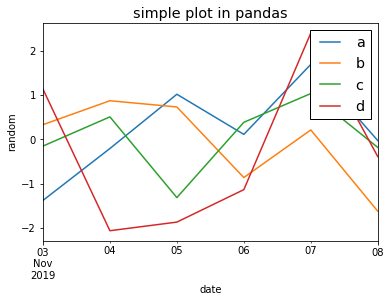

In [4]:
print(np.min(df))
print(np.min(df.T))
df.plot()
# plt.style.use('dark_background')
# plt.style.use('ggplot')
plt.style.use('classic')
plt.xlabel('date')
plt.ylabel('random')
plt.title('simple plot in pandas')
plt.legend()
plt.show()

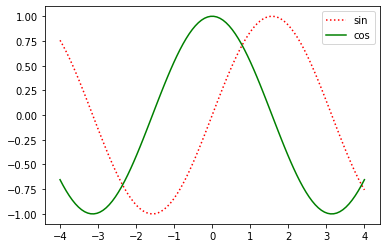

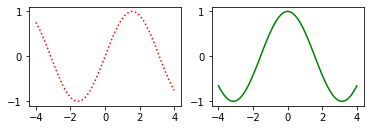

In [7]:
x=np.linspace(-4,4,100)
y1=np.sin(x)
y2=np.cos(x)
#plt.figure()
plt.plot(x,y1,':r')
plt.plot(x,y2,'-g')
plt.legend(('sin','cos'))
plt.show()

#plt.figure()
plt.subplot(2,2,1)
plt.plot(x,y1,':r')
plt.subplot(2,2,2)
plt.plot(x,y2,'-g')
plt.show()

[7.08511002 8.60162247 5.00057187 6.51166286 5.73377945 5.46169297
 5.93130106 6.72780364 6.98383737 7.69408367]


(array([ 2.,  3.,  4.,  8.,  8., 12., 14., 21., 35., 38., 48., 49., 45.,
        43., 43., 41., 27., 17., 12., 11., 10.,  6.,  2.,  0.,  1.]),
 array([-2.79308500e+00, -2.56012732e+00, -2.32716963e+00, -2.09421195e+00,
        -1.86125426e+00, -1.62829658e+00, -1.39533889e+00, -1.16238121e+00,
        -9.29423524e-01, -6.96465840e-01, -4.63508155e-01, -2.30550471e-01,
         2.40721386e-03,  2.35364898e-01,  4.68322583e-01,  7.01280267e-01,
         9.34237952e-01,  1.16719564e+00,  1.40015332e+00,  1.63311101e+00,
         1.86606869e+00,  2.09902637e+00,  2.33198406e+00,  2.56494174e+00,
         2.79789943e+00,  3.03085711e+00]),
 <a list of 25 Patch objects>)

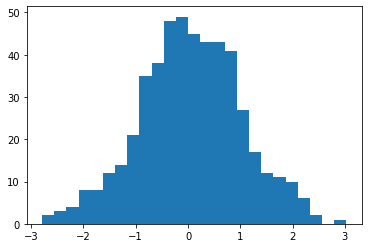

In [8]:
import numpy.random as rp
rp.seed(1)
a,b = 5,10
print(rp.rand(10)*(b-a)+a)
z=rp.standard_normal(500)
plt.hist(z,bins=25)

In [9]:
'''
min 0.5 x^t P x + q x
subject to
G x <= h
A x = b

all numbers should be doubles, not intergers
column-wise, not row-wise like np
'''

'''
min 0.5x^2 +3x+4y
subject to
x, y ≥ 0
x + 3y ≥ 15 
2x + 5y ≤ 100 
3x + 4y ≤ 80
'''

import cvxopt as opt
P = opt.matrix([[1.0,0.0],[0.0,0.0]])
q = opt.matrix([3.0,4.0])
G = opt.matrix([[-1.0,0.0,-1.0,2.0,3.0],[0.0,-1.0,-3.0,5.0,4.0]])
h = opt.matrix([0.0,0.0,-15.0,100.0,80.0])

sol = opt.solvers.qp(P,q,G,h)

print(type(sol))
print(sol.keys())
print('solution is {}'.format(sol['x']))
print('optimal value is {}'.format(sol['primal objective']))

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  4e-17  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  8e-17  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  8e-17  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  7e-17  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  1e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  9e-17  4e-16
 6:  2.0062e+01  1.9974e+01  9e-02  7e-17  2e-16
 7:  2.0001e+01  2.0000e+01  9e-04  8e-17  2e-16
 8:  2.0000e+01  2.0000e+01  9e-06  1e-16  2e-16
Optimal solution found.
<class 'dict'>
dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'iterations'])
solution is [ 7.13e-07]
[ 5.00e+00]

optimal value is 20.00000617311241


In [10]:
#DJ's KNN
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
x,y=data.data, data.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.972027972027972


In [1]:
from theano import function, tensor as tt
x=tt.dmatrix('x')
s=tt.sum(1/(1+tt.exp(-x)))
gs=tt.grad(s,x)
dlogistic=function([x],gs)

In [3]:
dlogistic([[3,-1],[0,2]])

array([[0.04517666, 0.19661193],
       [0.25      , 0.10499359]])

standard normal: mu= 0.0606, std=0.8852, kurtosis=-0.0011
student t dist : mu= 0.0813, std=1.2693, kurtosis=2.2274
Levy stable    : mu= 0.0602, std=1.1235, kurtosis=4.3650


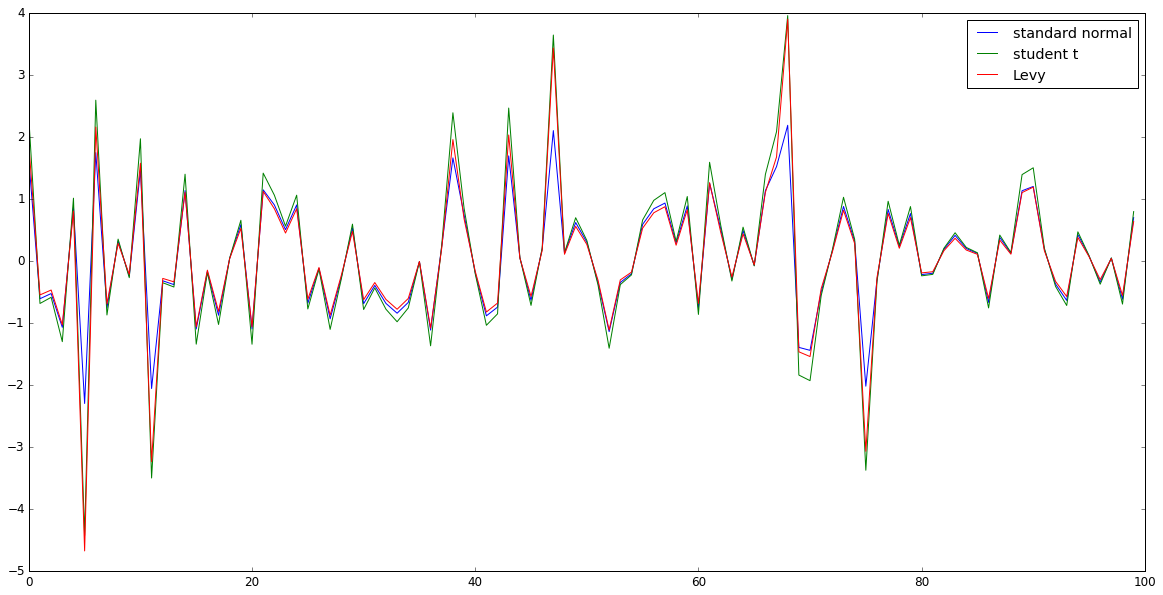

In [2]:
import numpy as np
from scipy.stats import norm, kurtosis
from scipy.stats import t
from scipy.stats import levy_stable
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
#normal sample
z = np.random.normal(size=100)

#find the probability (CDF)
p = norm.cdf(z)

#find the probability (percent point function)
#t-distribution
t = t.ppf(p, df=3)

#Levy-distribution
α = 1.5
scale = 0.5 ** (1/α)
l = levy_stable.ppf(p, α, 0, scale=scale)

print('standard normal: mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(z.mean(),z.std(),kurtosis(z)))
print('student t dist : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(t.mean(),t.std(),kurtosis(t)))
print('Levy stable    : mu= {:5.4f}, std={:5.4f}, kurtosis={:5.4f}'.format(l.mean(),l.std(),kurtosis(l)))

plt.figure(figsize=(20,10))
plt.style.use('classic')
plt.plot(z)
plt.plot(t)
plt.plot(l)
plt.legend(('standard normal','student t','Levy'))

intercept = [4.14761402], slopt = [[3.00177591]], r_sq = 0.9678061140361351


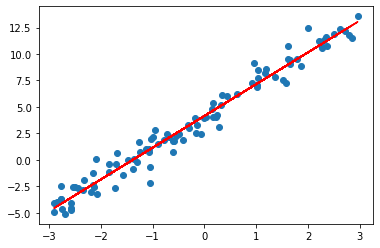

In [8]:
import numpy as np
x=6*np.random.rand(100,1)-3
y=4+3*x+np.random.randn(100,1)

#DJ's choice
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x,y)
y_pred=reg.predict(x)

print('intercept = {}, slopt = {}, r_sq = {}'.format(reg.intercept_, reg.coef_, reg.score(x,y)))

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)
plt.plot(x,y_pred,'r-')
plt.show()